# 8절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
#import statsmodels.api
from statsmodels.api import datasets
iris_df=datasets.get_rdataset("iris",package='datasets').data
iris_df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## 8.1 Group by

In [2]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [3]:
iris_df.pivot_table(index='Species', 
                values=['Sepal.Length'],
                   aggfunc='sum')

Sepal.Length
Species                 
setosa             250.3
versicolor         296.8
virginica          329.4

In [4]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [5]:
iris_grouped.count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50

In [6]:
iris_df.loc[1, 'Sepal.Length'] = np.nan

In [7]:
import random
rownum = random.sample(range(len(iris_df)), 4)
rownum

[132, 24, 117, 111]

In [8]:
for row in rownum:
    iris_df.loc[row, 'Sepal.Length'] = np.nan

In [9]:
iris_df.loc[rownum, 'Sepal.Length']

132   NaN
24    NaN
117   NaN
111   NaN
Name: Sepal.Length, dtype: float64

In [10]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa                48           50            50           50
versicolor            50           50            50           50
virginica             47           50            50           50

다중 열로 그룹화

In [11]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).mean().head()

Sepal.Width  Petal.Length  Petal.Width
Species Sepal.Length                                        
setosa  4.3              3.000000      1.100000        0.100
        4.4              3.033333      1.333333        0.200
        4.5              2.300000      1.300000        0.300
        4.6              3.325000      1.325000        0.225
        4.7              3.200000      1.450000        0.200

In [12]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  3.0  3.033333  0.152753  2.9  2.950  3.00   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  4.0  3.125000  0.189297  3.0  3.000  3.05   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  8.0  3.362500  0.192261  3.0  3.275  3.40   
           5.1                  8.0  3.600000  0.200000  3.3  3.475  3.60   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.3                  1.0  3.700000       NaN  3.7  3.700  3.70   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  2.0  2.150000  0.212132  2.0  2.075  2.15   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.2                  1.0  2.700000       NaN  2.7  2.700  2.70   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  5.0  2.440000  0.114018  2.3  2.400  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  5.0  2.820000  0.148324  2.6  2.800  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  2.0  2.950000  0.070711  2.9  2.925  2.95   
           6.7                  3.0  3.066667  0.057735  3.0  3.050  3.10   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.7                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  2.0  3.100000  0.424264  2.8  2.950  3.10   
           6.3                  6.0  2.933333  0.350238  2.5  2.725  2.85   
           6.4                  3.0  3.033333  0.208167  2.8  2.950  3.10   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9      

In [14]:
iris_df.groupby(iris_df.Species).mean()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa           5.01250        3.428         1.462        0.246
versicolor       5.93600        2.770         4.260        1.326
virginica        6.57234        2.974         5.552        2.026

<AxesSubplot:xlabel='Species'>

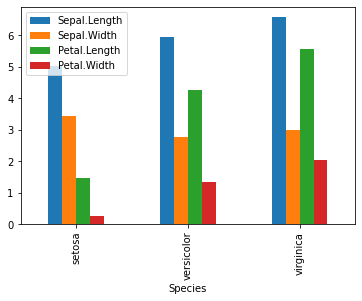

In [33]:
iris_df.groupby(iris_df.Species).mean().plot(kind='bar') #기본적으로 라인플롯

In [34]:
g=iris_df.groupby(iris_df.Species).mean()

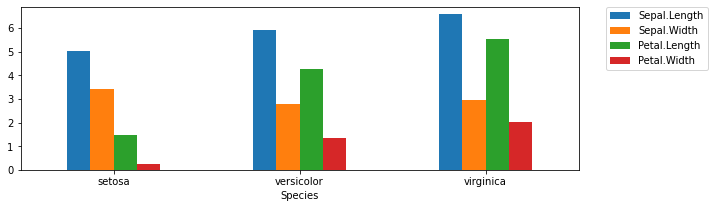

In [29]:
import matplotlib.pyplot as plt
g.plot(kind='bar',rot=0,figsize=(10,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
iris_df.groupby(iris_df.Species).describe()

Sepal.Length                                              \
                  count     mean       std  min  25%  50%  75%  max   
Species                                                               
setosa             48.0  5.01250  0.358261  4.3  4.8  5.0  5.2  5.8   
versicolor         50.0  5.93600  0.516171  4.9  5.6  5.9  6.3  7.0   
virginica          47.0  6.57234  0.634070  4.9  6.2  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [38]:
iris_df.groupby(iris_df.Species).describe().transpose() #전치행렬로 바뀌어 나옴

Species                setosa  versicolor  virginica
Sepal.Length count  48.000000   50.000000  47.000000
             mean    5.012500    5.936000   6.572340
             std     0.358261    0.516171   0.634070
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.200000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [44]:
g=iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.981481     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.325000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.500000     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [45]:
g.unstack() #끝에 있는 인덱스 Petal.Width가 컬럼값으로 온다

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.981481  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [46]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.981481         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

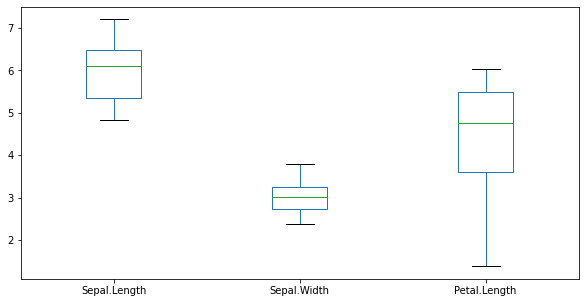

In [47]:
g.plot.box(figsize=(10,5))

In [50]:
iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.981481     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.325000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.500000     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [51]:
g=iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g.unstack()

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.981481  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [53]:
import pandas as pd
pd.options.display.max_columns

20

In [54]:
pd.options.display.max_columns=22

In [55]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.981481         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

## 8.2 그룹간 데이터

In [57]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group                        

In [60]:
for idx,grouped in enumerate(iris_group):
    print(idx,'번째 그룹은 ')
    print(grouped) #grouped는 튜플이다.
    print('=====================')

0 번째 그룹은 
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14  

In [64]:
for idx,(species_name,group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ',species_name)
    print(type(group))
    print(group.sample(5).sort_index()) #랜덤으로 5개뽑아줌
    print('===================================')

0 번째 그룹은  setosa
<class 'pandas.core.frame.DataFrame'>
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
11           4.8          3.4           1.6          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
49           5.0          3.3           1.4          0.2  setosa
1 번째 그룹은  versicolor
<class 'pandas.core.frame.DataFrame'>
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
52           6.9          3.1           4.9          1.5  versicolor
58           6.6          2.9           4.6          1.3  versicolor
81           5.5          2.4           3.7          1.0  versicolor
89           5.5          2.5           4.0          1.3  versicolor
92           5.8          2.6           4.0          1.2  versicolor
2 번째 그룹은  virginica
<class 'pandas.core.frame.DataFrame'>
     Sepal.Length  Sepal

## 8.3 데이터 프레임 그룹 인덱싱 

In [73]:
#for idx,(species_name,group) in enumerate(iris_group):
#    print(idx,'번째 그룹은 ',species_name)
#    print(group.head(3)) #랜덤으로 5개뽑아줌
#    print(group.iloc[[1,11],:]) #1번째, 11번째 가져옴
#    print('===================================')
iris_df.groupby(iris_df.Species).take([1,11,21,31]) #각 종별 1,11,21,31번째 가져오기.

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             NaN          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
virginica  101           5.8          2.7           5.1          1.9
           111           NaN          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0

In [74]:
t=iris_df.groupby(iris_df.Species).take([1,11,21,31])
t.loc['setosa']

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
1            NaN          3.0           1.4          0.2
11           4.8          3.4           1.6          0.2
21           5.1          3.7           1.5          0.4
31           5.4          3.4           1.5          0.4

In [76]:
#레이블을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(iris_df['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
iris_df['species']=le.fit_transform(iris_df['Species'])
iris_df

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  species
0             5.1          3.5           1.4          0.2     setosa        0
1             NaN          3.0           1.4          0.2     setosa        0
2             4.7          3.2           1.3          0.2     setosa        0
3             4.6          3.1           1.5          0.2     setosa        0
4             5.0          3.6           1.4          0.2     setosa        0
..            ...          ...           ...          ...        ...      ...
145           6.7          3.0           5.2          2.3  virginica        2
146           6.3          2.5           5.0          1.9  virginica        2
147           6.5          3.0           5.2          2.0  virginica        2
148           6.2          3.4           5.4          2.3  virginica        2
149           5.9          3.0           5.1          1.8  virginica        2

[150 rows x 6 columns]

In [ ]:
#데이터끼리 합해야하는데 구조가 안 맞는 경우 구조를 합하기 위해 melt 사용.

# 9절 데이터 구조 변경

## 9.1 와이드 포맷과 롱 포맷

판다스 공식 문서에 나오는 melt : <br>
https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
    
[Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 7page

In [84]:
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality")
#package 생략시 datasets에서 가져옴
airquality=airquality_data.data
airquality

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]

In [ ]:
## 0.2 melt를 이용한 언피벗팅

In [90]:
airquality_melted=airquality.melt(id_vars=['Month','Day']) #실제 데이터가 변하는건 아니다.
airquality_melted

Month  Day variable  value
0        5    1    Ozone   41.0
1        5    2    Ozone   36.0
2        5    3    Ozone   12.0
3        5    4    Ozone   18.0
4        5    5    Ozone    NaN
..     ...  ...      ...    ...
607      9   26     Temp   70.0
608      9   27     Temp   77.0
609      9   28     Temp   75.0
610      9   29     Temp   76.0
611      9   30     Temp   68.0

[612 rows x 4 columns]

In [88]:
airquality.sample() #실제 데이터 확인

Ozone  Solar.R  Wind  Temp  Month  Day
81   16.0      7.0   6.9    74      7   21

In [93]:
 #variable, value 값을 바꾸고싶다!
#shift tab tab으로 설명 확인
airquality.melt(id_vars=['Month','Day'],var_name='변수',value_name='값')

Month  Day     변수     값
0        5    1  Ozone  41.0
1        5    2  Ozone  36.0
2        5    3  Ozone  12.0
3        5    4  Ozone  18.0
4        5    5  Ozone   NaN
..     ...  ...    ...   ...
607      9   26   Temp  70.0
608      9   27   Temp  77.0
609      9   28   Temp  75.0
610      9   29   Temp  76.0
611      9   30   Temp  68.0

[612 rows x 4 columns]

## 9.2 melt 를 이용한 언피벗팅

In [104]:
airquality_melted_sort=airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort

Month  Day variable  value
0        5    1    Ozone   41.0
153      5    1  Solar.R  190.0
306      5    1     Wind    7.4
459      5    1     Temp   67.0
1        5    2    Ozone   36.0
..     ...  ...      ...    ...
610      9   29     Temp   76.0
152      9   30    Ozone   20.0
305      9   30  Solar.R  223.0
458      9   30     Wind   11.5
611      9   30     Temp   68.0

[612 rows x 4 columns]

In [101]:
airquality_melted_sort.head()

Month  Day variable  value
0        5    1    Ozone   41.0
153      5    1  Solar.R  190.0
306      5    1     Wind    7.4
459      5    1     Temp   67.0
1        5    2    Ozone   36.0

In [102]:
airquality.head(1)

Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1

In [103]:
import pandas as pd
airquality.melt(id_vars=['Month','Day'])
#pd.melt(airquality,id_vars=['Month','Day'])

Month  Day variable  value
0        5    1    Ozone   41.0
1        5    2    Ozone   36.0
2        5    3    Ozone   12.0
3        5    4    Ozone   18.0
4        5    5    Ozone    NaN
..     ...  ...      ...    ...
607      9   26     Temp   70.0
608      9   27     Temp   77.0
609      9   28     Temp   75.0
610      9   29     Temp   76.0
611      9   30     Temp   68.0

[612 rows x 4 columns]

## 9.3 pivot_table을 이용한 피벗팅(롱형->와이드형)

In [111]:
# 멜트된 데이터 프레임 airquality_melted, airquality_melted_sort
airquality2=airquality_melted.pivot_table(index=['Month','Day'],columns=['variable'],
                             values=['value'])
airquality2

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [108]:
airquality_melted.head(4)

Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0

In [113]:
airquality #airquality와 airquality2는 현재 차원의 차이가 있다.

Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]

In [116]:
airquality2.loc[5].head()

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [118]:
airquality2=airquality2.reset_index(level=['Month','Day'],col_level=1)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [119]:
airquality2.columns

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [123]:
airquality2.columns=airquality2.columns.droplevel(level=0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [124]:
airquality2

variable  Month  Day  Ozone  Solar.R  Temp  Wind
0             5    1   41.0    190.0  67.0   7.4
1             5    2   36.0    118.0  72.0   8.0
2             5    3   12.0    149.0  74.0  12.6
3             5    4   18.0    313.0  62.0  11.5
4             5    5    NaN      NaN  56.0  14.3
..          ...  ...    ...      ...   ...   ...
148           9   26   30.0    193.0  70.0   6.9
149           9   27    NaN    145.0  77.0  13.2
150           9   28   14.0    191.0  75.0  14.3
151           9   29   18.0    131.0  76.0   8.0
152           9   30   20.0    223.0  68.0  11.5

[153 rows x 6 columns]

In [131]:
airquality_melted_sort
airquality3=airquality_melted_sort.pivot_table(index=['Month','Day'],columns=['variable'],
                             values=['value'])
airquality3=airquality3.reset_index(level=['Month','Day'],col_level=1)
airquality3.columns=airquality3.columns.droplevel(level=0)
airquality3.head()

variable  Month  Day  Ozone  Solar.R  Temp  Wind
0             5    1   41.0    190.0  67.0   7.4
1             5    2   36.0    118.0  72.0   8.0
2             5    3   12.0    149.0  74.0  12.6
3             5    4   18.0    313.0  62.0  11.5
4             5    5    NaN      NaN  56.0  14.3

In [130]:
import numpy as np
a = np.nan
a

nan

In [133]:
if a is None:
    print("a==None")
else:
    print("a!=None")

a!=None


In [134]:
#주택도시보증공사_전국 평균 분양가격(2019년 12월).csv 를 df_last 변수에 
#전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv 를 df_first 변수에 입력받음
#df_last랑 df_first를 concat하기 위해 df_first를 df_last와 비슷한 구조로 변환
#(시간별 평당분양가격의 추이, 지역별 평당분양가격의 추이)
#


In [231]:
import pandas as pd
df_first=pd.read_csv('E:/kim_jiwon/src/08_python/data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',sep=',',encoding='cp949')
df_first.head(10)

지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
0  서울     18189    17925    17925    18016    18098    19446    18867   
1  부산      8111     8111     9078     8965     9402     9501     9453   
2  대구      8080     8080     8077     8101     8267     8274     8360   
3  인천     10204    10204    10408    10408    10000     9844    10058   
4  광주      6098     7326     7611     7346     7346     7523     7659   
5  대전      8321     8321     8321     8341     8341     8341     8333   
6  울산      8090     8090     8090     8153     8153     8153     8153   
7  경기     10855    10855    10791    10784    10876    10646    10266   
8  세종      7601     7600     7532     7814     7908     7934     8067   
9  강원      6230     6230     6230     6141     6373     6350     6350   

   2014년7월  2014년8월  2014년9월  2014년10월  2014년11월  2014년12월  2015년1월  2015년2월  \
0    18742    19274    19404     19759     20242     20269    20670    20670   
1     9457     9411     9258      9110      9208      9208     9204     9235   
2     8360     8370     8449      8403      8439      8253     8327     8416   
3     9974     9973     9973     10016     10020     10020    10017     9876   
4     7612     7622     7802      7707      7752      7748     7752     7756   
5     8333     8333     8048      8038      8067      8067     8067     8067   
6     8153     8493     8493      8627      8891      8891     8526     8526   
7    10124    10134    10501     10397     10356     10379    10391    10355   
8     8067     8141     8282      8527      8592      8560     8560     8560   
9     6268     6268     6419      6631      6365      6365     6348     6350   

   2015년3월  2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
0    19415    18842    18367    18374    18152    18443  
1     9279     9327     9345     9515     9559     9581  
2     8441     8446     8568     8542     8542     8795  
3     9876     9938    10551    10443    10443    10449  
4     7861     7914     7877     7881     8089     8231  
5     8067     8145     8272     8079     8079     8079  
6     8629     9380     9192     9190     9190     9215  
7    10469    10684    10685    10573    10518    10573  
8     8555     8546     8546     8671     8669     8695  
9     6182     6924     6846     6986     7019     7008

In [232]:
df_last=pd.read_csv('E:/kim_jiwon/src/08_python/data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',sep=',',encoding='cp949')
df_last.head(10)

지역명               규모구분    연도   월 분양가격(㎡)
0  서울                 전체  2015  10    5841
1  서울         전용면적 60㎡이하  2015  10    5652
2  서울   전용면적 60㎡초과 85㎡이하  2015  10    5882
3  서울  전용면적 85㎡초과 102㎡이하  2015  10    5721
4  서울        전용면적 102㎡초과  2015  10    5879
5  인천                 전체  2015  10    3163
6  인천         전용면적 60㎡이하  2015  10    3488
7  인천   전용면적 60㎡초과 85㎡이하  2015  10    3119
8  인천  전용면적 85㎡초과 102㎡이하  2015  10    3545
9  인천        전용면적 102㎡초과  2015  10    3408

In [227]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [228]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [235]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [236]:
import pandas as pd
df_last['연도']=df_last["연도"].astype('str')
df_last['월']=df_last["월"].astype('str')

In [240]:
df_last['분양가격(㎡)']=df_last["분양가격(㎡)"].astype('float64')
#빈 문자는 변경해줄수없다.

ValueError: could not convert string to float: ''

In [241]:
import pandas as pd
df_last["분양가격(㎡)"]=pd.to_numeric(df_last["분양가격(㎡)"],errors="coerce")
#공백문자 등이 결측치화

In [239]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   object
 3   월        4335 non-null   object
 4   분양가격(㎡)  4058 non-null   object
dtypes: object(5)
memory usage: 169.5+ KB


In [242]:
df_last.head(1)

지역명 규모구분    연도   월  분양가격(㎡)
0  서울   전체  2015  10   5841.0

In [ ]:
df_last["평당분양가격"]=df_last["분양가격(㎡)"]*3.3

In [ ]:
df_last["연도월"]=df_last["연도"]+년+df_last["월"]+월

In [ ]:
new_last=df_last.loc[df_last["규모구분"]==]

In [ ]:
# concat 하기 위해 df_first를 new_first로 바꾸기 (지역명, 연도, 월, 평당분양가격)

In [243]:
new_first = df_first.melt(id_vars="지역",
                         var_name="연도월",
                         value_name="평당분양가격")

In [244]:
new_first

지역       연도월  평당분양가격
0    서울  2013년12월   18189
1    부산  2013년12월    8111
2    대구  2013년12월    8080
3    인천  2013년12월   10204
4    광주  2013년12월    6098
..   ..       ...     ...
352  전북   2015년8월    6580
353  전남   2015년8월    6289
354  경북   2015년8월    7037
355  경남   2015년8월    7665
356  제주   2015년8월    7343

[357 rows x 3 columns]

In [ ]:
result=pd.concat([new_first,new_last])

In [ ]:
#===============================

In [ ]:
# 데이터프레임의 구조를 바꾸는 함수들 melt, pivot_table(연산을 함),pivot(연산 X)

In [246]:
import numpy as np
year=[2020,2020,2020,2021,2021,2021,]
mon=[1,2,3]*2
latte=[410,401,402,300,302,305]
americano=[350,552,543,420,540,440]
mocha=[350,299,300,301,302,300]
sales=pd.DataFrame({'year':year,'mon':mon,'latte':latte,'americano':americano,'mocha':mocha})
sales

year  mon  latte  americano  mocha
0  2020    1    410        350    350
1  2020    2    401        552    299
2  2020    3    402        543    300
3  2021    1    300        420    301
4  2021    2    302        540    302
5  2021    3    305        440    300

In [ ]:
airquality.melt(id_vars=['Month','Day'])

In [251]:
sales_melted=sales.melt(id_vars=['year','mon'])
sales_melted

year  mon   variable  value
0   2020    1      latte    410
1   2020    2      latte    401
2   2020    3      latte    402
3   2021    1      latte    300
4   2021    2      latte    302
5   2021    3      latte    305
6   2020    1  americano    350
7   2020    2  americano    552
8   2020    3  americano    543
9   2021    1  americano    420
10  2021    2  americano    540
11  2021    3  americano    440
12  2020    1      mocha    350
13  2020    2      mocha    299
14  2020    3      mocha    300
15  2021    1      mocha    301
16  2021    2      mocha    302
17  2021    3      mocha    300

In [255]:
sales2=sales_melted.pivot_table(index=['year','mon'],columns=['variable'],values=['value'])
sales2

value            
variable americano latte mocha
year mon                      
2020 1         350   410   350
     2         552   401   299
     3         543   402   300
2021 1         420   300   301
     2         540   302   302
     3         440   305   300

In [258]:
latte_sales=sales.loc[:,'year':'latte']
latte_sales

year  mon  latte
0  2020    1    410
1  2020    2    401
2  2020    3    402
3  2021    1    300
4  2021    2    302
5  2021    3    305

In [259]:
latte_sales.pivot('year','mon') #year는 index로, mon은 column으로

latte          
mon      1    2    3
year                
2020   410  401  402
2021   300  302  305

# 10절. 데이터 프레임에 함수적용시키기

## 10.1 apply
- 데이터프레임이나 시리즈에 각 열 또는 각 행에 함수 적용

In [260]:
import statsmodels.api as sm
iris_df=sm.datasets.get_rdataset("iris",package="datasets").data
iris_df.sample()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
58           6.6          2.9           4.6          1.3  versicolor

In [262]:
#독립변수
iris_df.iloc[:,:-1].head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [263]:
iris_df.loc[:,'Sepal.Length':'Petal.Width'].head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [265]:
X=iris_df.loc[:,'Sepal.Length':'Petal.Width']
X.apply(np.round)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.0          4.0           1.0          0.0
1             5.0          3.0           1.0          0.0
2             5.0          3.0           1.0          0.0
3             5.0          3.0           2.0          0.0
4             5.0          4.0           1.0          0.0
..            ...          ...           ...          ...
145           7.0          3.0           5.0          2.0
146           6.0          2.0           5.0          2.0
147           6.0          3.0           5.0          2.0
148           6.0          3.0           5.0          2.0
149           6.0          3.0           5.0          2.0

[150 rows x 4 columns]

In [268]:
X.apply(np.sum,axis=0) # 열별

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [269]:
X.apply(np.sum,axis=1) # 행별

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [273]:
#각 데이터와 평균과의 거리를 출력: 리스트 형태로 출력
avg=X.apply(np.average)
X.apply(lambda x : x-avg,axis=1)


#def avg_diff(x):
#    return x-avg

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0       -0.743333     0.442667        -2.358    -0.999333
1       -0.943333    -0.057333        -2.358    -0.999333
2       -1.143333     0.142667        -2.458    -0.999333
3       -1.243333     0.042667        -2.258    -0.999333
4       -0.843333     0.542667        -2.358    -0.999333
..            ...          ...           ...          ...
145      0.856667    -0.057333         1.442     1.100667
146      0.456667    -0.557333         1.242     0.700667
147      0.656667    -0.057333         1.442     0.800667
148      0.356667     0.342667         1.642     1.100667
149      0.056667    -0.057333         1.342     0.600667

[150 rows x 4 columns]

In [275]:
#result_type='broadcast' 출력타입을 원본 데이터 그대로. X랑 똑같은 타입으로(이 경우에는 데이터프레임으로 출력해준다.)
avg=X.apply(np.average)
X.apply(lambda x : x-avg,axis=1,result_type='broadcast')

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0       -0.743333     0.442667        -2.358    -0.999333
1       -0.943333    -0.057333        -2.358    -0.999333
2       -1.143333     0.142667        -2.458    -0.999333
3       -1.243333     0.042667        -2.258    -0.999333
4       -0.843333     0.542667        -2.358    -0.999333
..            ...          ...           ...          ...
145      0.856667    -0.057333         1.442     1.100667
146      0.456667    -0.557333         1.242     0.700667
147      0.656667    -0.057333         1.442     0.800667
148      0.356667     0.342667         1.642     1.100667
149      0.056667    -0.057333         1.342     0.600667

[150 rows x 4 columns]

In [276]:
new_first.head

<bound method NDFrame.head of      지역       연도월  평당분양가격
0    서울  2013년12월   18189
1    부산  2013년12월    8111
2    대구  2013년12월    8080
3    인천  2013년12월   10204
4    광주  2013년12월    6098
..   ..       ...     ...
352  전북   2015년8월    6580
353  전남   2015년8월    6289
354  경북   2015년8월    7037
355  경남   2015년8월    7665
356  제주   2015년8월    7343

[357 rows x 3 columns]>

In [280]:
date="2021년3월"
date.split("년")

['2021', '3월']

In [291]:
def parse_year(x):
    return int(x.split("년")[0])
parse_year(date)

2021

In [285]:
def parse_month(x):
    return int(x.split("년")[-1].replace("월",""))
parse_month(date)

3

In [296]:
new_first["연도"]=new_first["연도월"].apply(lambda x:int(x.split("년")[0]))

In [297]:
new_first["월"]=new_first["연도월"].apply(lambda x:int(x.split("년")[-1].replace("월","")))

In [298]:
new_first.head(2)

지역       연도월  평당분양가격    연도   월
0  서울  2013년12월   18189  2013  12
1  부산  2013년12월    8111  2013  12

In [299]:
## 10.2 applymap
- apply : 행 또는 열단위로 함수적용
- applymap : 각 요소 하나하나별로 적용 

In [303]:
X.applymap(lambda x :
           x**2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           26.01        12.25          1.96         0.04
1           24.01         9.00          1.96         0.04
2           22.09        10.24          1.69         0.04
3           21.16         9.61          2.25         0.04
4           25.00        12.96          1.96         0.04
..            ...          ...           ...          ...
145         44.89         9.00         27.04         5.29
146         39.69         6.25         25.00         3.61
147         42.25         9.00         27.04         4.00
148         38.44        11.56         29.16         5.29
149         34.81         9.00         26.01         3.24

[150 rows x 4 columns]

## 10.3 map
- 시리즈타입의 벡터만 가능

In [306]:
new_first["연도"]=new_first["연도월"].map(lambda x:int(x.split("년")[0]))

In [307]:
new_first.head(2)

지역       연도월  평당분양가격    연도   월
0  서울  2013년12월   18189  2013  12
1  부산  2013년12월    8111  2013  12

In [308]:
x=pd.Series(["홍길동",20,'서울 마포'],index=["Name","Age","Address"])
x

Name         홍길동
Age           20
Address    서울 마포
dtype: object

In [311]:
def my_func(data):
    return data,len(str(data))
my_func("홍길동")

('홍길동', 3)

In [312]:
x.map(my_func)

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [315]:
x.map(lambda data: (data,len(str(data))))

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [317]:
#딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈값이 적용 
dic = {"홍길동":"김길동",20:25,"마포":"서대문"}
x.map(dic)

Name       김길동
Age         25
Address    NaN
dtype: object

In [318]:
s=pd.Series([1,2,3,4,None])

In [321]:
s.map(lambda x : (x,x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [ ]:
#연산적용이 안 되는 부분은 적용하지 않도록

In [322]:
s.map(lambda x : (x,x**2),na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절 일괄 변경하기(결측치나 특정값)

## 11.1 fillna(결측치를 어떤 측정값으로 바꿔라)

In [329]:
import numpy as np
df=pd.DataFrame([[np.nan,2,np.nan,0],
                [3,4,np.nan,1],
                [np.nan,3,np.nan,5],
                [np.nan,3,np.nan,4]],
                columns = list('ABCD'))
df

A  B   C  D
0  NaN  2 NaN  0
1  3.0  4 NaN  1
2  NaN  3 NaN  5
3  NaN  3 NaN  4

In [330]:
#모든 결측치를 0으로 채움
df.fillna(0)

A  B    C  D
0  0.0  2  0.0  0
1  3.0  4  0.0  1
2  0.0  3  0.0  5
3  0.0  3  0.0  4

In [331]:
#결측치가 아닌 이전값 또는 바로 다음 값
    # pad/ffill: 결측치가 아닌 이전 값으로 채움
    # backfill/bfill:  결측치가 아닌 다음 값으로 채움
df.fillna(method="ffill")

A  B   C  D
0  NaN  2 NaN  0
1  3.0  4 NaN  1
2  3.0  3 NaN  5
3  3.0  3 NaN  4

In [332]:
df.fillna(method="bfill")

A  B   C  D
0  3.0  2 NaN  0
1  3.0  4 NaN  1
2  NaN  3 NaN  5
3  NaN  3 NaN  4

In [334]:
values={"A":99,"B":98,"C":97,"D":95} #열별 결측치 대체값
df.fillna(value=values)

A  B     C  D
0  99.0  2  97.0  0
1   3.0  4  97.0  1
2  99.0  3  97.0  5
3  99.0  3  97.0  4

In [338]:
df.fillna(value=df.mean())

A  B   C  D
0  3.0  2 NaN  0
1  3.0  4 NaN  1
2  3.0  3 NaN  5
3  3.0  3 NaN  4

In [337]:
df.fillna(value=df.median())
#모두 결측치가 있는 C컬름은 결측치인 상태 그대로 대체되지 않았다.

A  B   C  D
0  3.0  2 NaN  0
1  3.0  4 NaN  1
2  3.0  3 NaN  5
3  3.0  3 NaN  4

In [340]:
mean=df.mean()

In [342]:
from math import isnan
for key, value in mean.items():
    if isnan(value):
        mean[key]=0
#    print(idx,value)

mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [343]:
df.fillna(value=mean)

A  B    C  D
0  3.0  2  0.0  0
1  3.0  4  0.0  1
2  3.0  3  0.0  5
3  3.0  3  0.0  4

In [ ]:
df.fillna(value)

## 11.2 replace(to_value,value,inplace=False)
- to_value를 new_value로 변경
- inplace = False : 변경된 내용을 반환, 데이터프레임 적용되지 않음
- inplace=True: 변경된 내용이 데이터 프레임에 적용되고 반환값은 없음


In [7]:
import pandas as pd
s = pd.Series([0,1,2,3,4, None])
s.replace(0 , 5, inplace=True)
s

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

In [5]:
s.replace(np.nan, 3)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [8]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                   'B':[5,6,7,8,9],
                   'C':['a','b','c','d','e']})
df

A  B  C
0  0  5  a
1  1  6  b
2  2  7  c
3  3  8  d
4  4  9  e

In [10]:
df.replace([0,1,2,3],99)

A  B  C
0  99  5  a
1  99  6  b
2  99  7  c
3  99  8  d
4   4  9  e

In [11]:
df.replace([0,1,2,3],[99,98,97,96]) # 0은99로, 1은98로 대체

A  B  C
0  99  5  a
1  98  6  b
2  97  7  c
3  96  8  d
4   4  9  e

In [9]:
df.replace(range(4),range(4,0,-1))  #[0,1,2,3]을 [4,3,2,1]로 대체

A  B  C
0  4  5  a
1  3  6  b
2  2  7  c
3  1  8  d
4  4  9  e

In [353]:
df.replace({'A':0,'B':5},99) #A열의 0rhk B열의 5를 99로 대체

A  B   C  D
0  NaN  2 NaN  0
1  3.0  4 NaN  1
2  NaN  3 NaN  5
3  NaN  3 NaN  4

In [12]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

A    B
0   bat  abc
1   foo  bar
2  bait  xyz

In [13]:
# to_value에 정규표현식이 사용된 경우 
# ba로 시작하고 마지막 임의의 문자가 있는 문자열을 )
df.replace(r'^ba.$', 'newBar', regex=True)

A       B
0  newBar     abc
1     foo  newBar
2    bait     xyz

In [14]:
df.replace({'A':r'^ba.$'},{'A':'newBar'}, regex=True)

A    B
0  newBar  abc
1     foo  bar
2    bait  xyz

## 11.3 where, mask

- where : 조건이 만족하는 요소는 그대로 출력. 만족되지 않는 요소는 대치하거나 결측치로 바꿈.
- mask: 조건이 만족하는 요소만 mask를 씌움.

In [357]:
s=pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [359]:
s.where(s>0)  #조건만족값만 보이고 만족하지 않으면 결측치로

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [358]:
s.where(s>0,99) #만족하지 않으면 99로

0    99
1     1
2     2
3     3
4     4
dtype: int64

In [361]:
s.mask(s>0,99) #만족하지 않으면 99로

0     0
1    99
2    99
3    99
4    99
dtype: int64

## 11.4 dropna
- 결측치 있는 데이터를 누락시킴

In [362]:
df=pd.DataFrame({"name":['박','김','최'],
                "age":[np.nan,20,60],
                "born":[np.nan,'서울',np.nan]})
df

name   age born
0    박   NaN  NaN
1    김  20.0   서울
2    최  60.0  NaN

In [363]:
df.dropna() #쳘측치가 있는 행 제거

name   age born
1    김  20.0   서울

In [364]:
df.dropna(how='all') # 행의 모든 열의 데이터가 다 결측치인 행만 제거
#df.dropna(how='all',inplace=True) 

name   age born
0    박   NaN  NaN
1    김  20.0   서울
2    최  60.0  NaN

In [365]:
df.dropna(how='any')

name   age born
1    김  20.0   서울

In [366]:
df.dropna(axis=1) #결측치가 있는 열들 제거

name
0    박
1    김
2    최

In [368]:
df.dropna(axis='columns')

name
0    박
1    김
2    최

In [370]:
df.dropna(thresh=2) #결측치 2개 이상인 행만 제거\

name   age born
1    김  20.0   서울
2    최  60.0  NaN

## 11.5 astype
- pandas의 Dtype 속성을 변경

In [375]:
# int 64 타입인 '월' colunms를 문자타입으로 변경
new_first["월"] = new_first["월"].astype('str')

In [376]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [378]:
new_first["평당가격"]=new_first["평당분양가격"].astype('float64',copy=True)
#new_first["평당가격"]이 바뀌어도 new_first["평당분양가격"]에 영향을 안 미침

# 12절 시리즈

In [382]:
s = pd.Series([1000,2000,2500,3000,4000],
              index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [383]:
s['mango']

2500

In [384]:
s['mango':'orange']

mango     2500
cherry    3000
orange    4000
dtype: int64

In [386]:
s[['mango','orange']]

mango     2500
orange    4000
dtype: int64

In [ ]:
s.drop('mango') 
#화면에는 사라져보이지만 실제로 사라진 것은 아니다. 
#inplace=True 하던가 S에 재할당해야 진짜로 사라짐

In [387]:
s.sort_values(ascending=False) #내림차순 정렬

orange    4000
cherry    3000
mango     2500
banana    2000
apple     1000
dtype: int64

In [389]:
s.to_frame()

0
apple   1000
banana  2000
mango   2500
cherry  3000
orange  4000

In [19]:
s.to_frame().T

0    1    2    3    4   5
0  5.0  1.0  2.0  3.0  4.0 NaN

In [ ]:
matplotlib.org/stable/ali/pyplot_summary.html